 ## Guía de Trabajos Prácticos 6

# **Librerías**

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import imutils

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Ejercicio 1:**  Modelos de ruido


1. Genere imágenes utilizando los diferentes modelos de ruido: normal, uniforme, sal y pimienta, impulsivo unimodal y exponencial, etc. Estudie la distribución obtenida analizando el histograma. Adapte sus funciones para que los ruidos gaussiano, uniforme y exponencial tengan su media en 0 (cero).

In [ ]:
def ruido_gaussiano(image, mean=100, stdev=10):
    gauss = np.random.normal(mean, stdev, image.shape)
    noise_image = image + gauss
    return np.uint8(noise_image)

def ruido_uniforme(image, low=-5, high=5):
    uniform = np.random.uniform(low, high, image.shape)
    noise_image = image + uniform
    return np.uint8(noise_image)

def ruido_impulsivo(image, salt_prob=0.01, pepper_prob=0.01):
    noise_image = image.copy()
    probs = np.random.random(noise_image.shape[:2])
    noise_image[probs < salt_prob] = 255
    noise_image[probs > 1 - pepper_prob] = 0
    return np.uint8(noise_image)

def ruido_exponencial(image, scale=25):
    exponencial = np.random.exponential(scale, image.shape)
    noise_image = image + exponencial
    return np.uint8(noise_image)

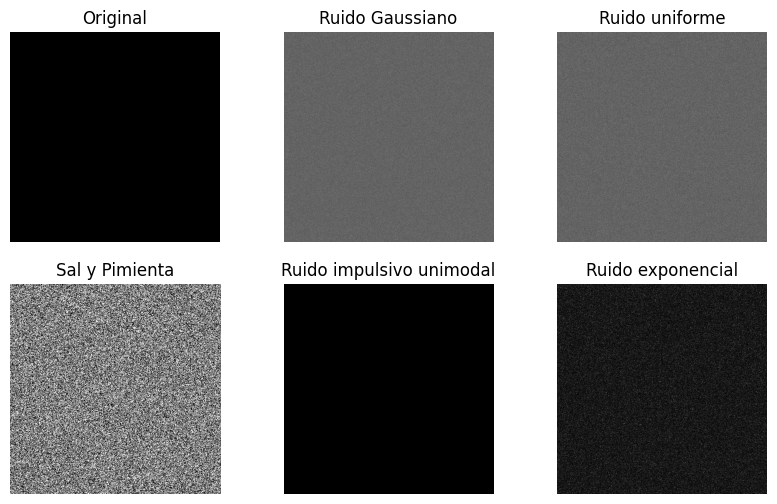

In [ ]:
# Cargar la imagen de ejemplo
image = np.uint8(np.zeros((600,600)))
img_shape = image.shape

# Aplicar diferentes tipos de ruido
gaussian_noisy = ruido_gaussiano(image, mean=100, stdev=10)
uniform_noisy = ruido_uniforme(image, low=80, high=120)
salt_and_pepper_noisy = ruido_impulsivo(image,salt_prob=0.5,pepper_prob=0.5)
impulsive_unimodal_noisy = ruido_impulsivo(image,salt_prob=0.0,pepper_prob=0.5)
exponential_noisy = ruido_exponencial(image)

# Mostrar y comparar imágenes ruidosas
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
plt.imshow(image,cmap='gray',vmin=0,vmax=255)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gaussian_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Ruido Gaussiano')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(uniform_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Ruido uniforme')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(salt_and_pepper_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Sal y Pimienta')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(impulsive_unimodal_noisy, cmap='gray',vmin=0,vmax=255)
plt.title('Ruido impulsivo unimodal')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(exponential_noisy, cmap='gray',vmin=0,vmax=255)
plt.title('Ruido exponencial')
plt.axis('off')

plt.show()

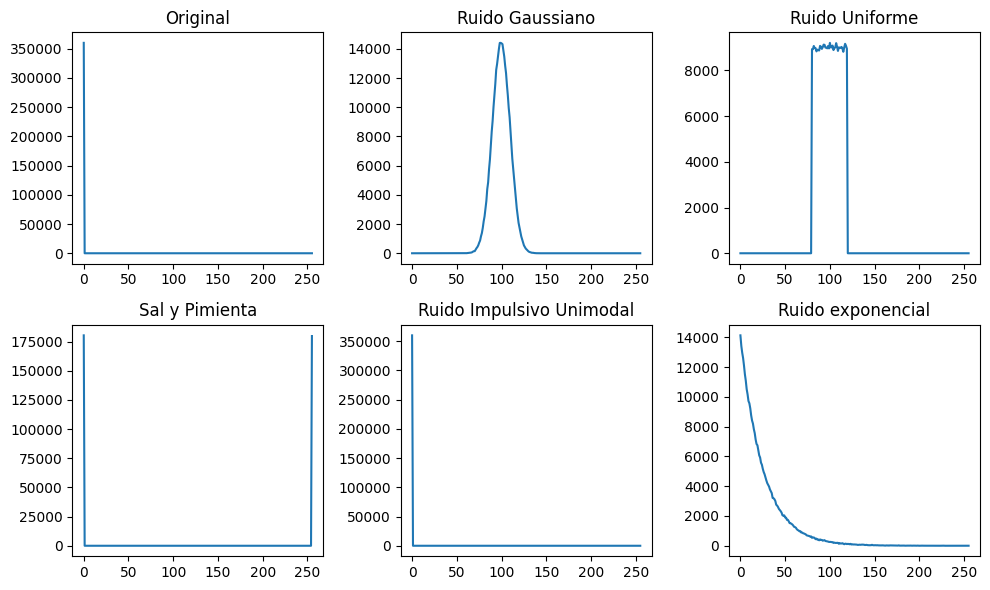

In [ ]:
# Obtener histogramas
hist_original = cv.calcHist([image], [0], None, [256], [0, 256])
hist_gaussian = cv.calcHist([gaussian_noisy], [0], None, [256], [0, 256])
hist_uniform = cv.calcHist([uniform_noisy], [0], None, [256], [0, 256])
hist_sp = cv.calcHist([salt_and_pepper_noisy], [0], None, [256], [0, 256])
hist_impulsive = cv.calcHist([impulsive_unimodal_noisy], [0], None, [256], [0, 256])
hist_exponential = cv.calcHist([exponential_noisy], [0], None, [256], [0, 256])

# Mostrar y comparar imágenes ruidosas
plt.figure(figsize=(10,6))
plt.subplot(2, 3, 1)
plt.plot(hist_original)
plt.title('Original')

plt.subplot(2, 3, 2)
plt.plot(hist_gaussian)
plt.title('Ruido Gaussiano')

plt.subplot(2, 3, 3)
plt.plot(hist_uniform)
plt.title('Ruido Uniforme')

plt.subplot(2, 3, 4)
plt.plot(hist_sp)
plt.title('Sal y Pimienta')

plt.subplot(2, 3, 5)
plt.plot(hist_impulsive)
plt.title('Ruido Impulsivo Unimodal')

plt.subplot(2, 3, 6)
plt.plot(hist_exponential)
plt.title('Ruido exponencial')

plt.tight_layout()
plt.show()

2. Genere una imagen (600 × 600px) que contenga 3 franjas verticales (600 × 200 px) de grises constantes, utilizando un gris claro (≈ 180), uno medio (≈ 120) y uno oscuro (≈ 60), y visualice el histograma.
Sume los ruidos generados previamente, con valor medio en cero, y visualice los histogramas. Varíe los parámetros del ruido (media, desvío, etc.) y verifique los efectos en el histograma para cada porción de grises constantes.

In [ ]:
franjas = np.zeros((600,600))
franjas[:,0:200] = 180
franjas[:,200:400] = 120
franjas[:,400:600] = 60
franjas = np.uint8(franjas)

# aplicar ruido
gaussian_noisy = ruido_gaussiano(franjas.copy(), mean=0, stdev=7)
uniform_noisy = ruido_uniforme(franjas.copy(), low=-10, high=10)
salt_and_pepper_noisy = ruido_impulsivo(franjas.copy(), salt_prob=0.15, pepper_prob=0.15)
impulsive_unimodal_noisy = ruido_impulsivo(franjas.copy(), salt_prob=0.0, pepper_prob=0.15)
exponential_noisy = ruido_exponencial(franjas.copy())

# Obtener histogramas
hist_original = cv.calcHist([franjas], [0], None, [256], [0, 256])
hist_gaussian = cv.calcHist([gaussian_noisy], [0], None, [256], [0, 256])
hist_uniform = cv.calcHist([uniform_noisy], [0], None, [256], [0, 256])
hist_sp = cv.calcHist([salt_and_pepper_noisy], [0], None, [256], [0, 256])
hist_impulsive = cv.calcHist([impulsive_unimodal_noisy], [0], None, [256], [0, 256])
hist_exponential = cv.calcHist([exponential_noisy], [0], None, [256], [0, 256])

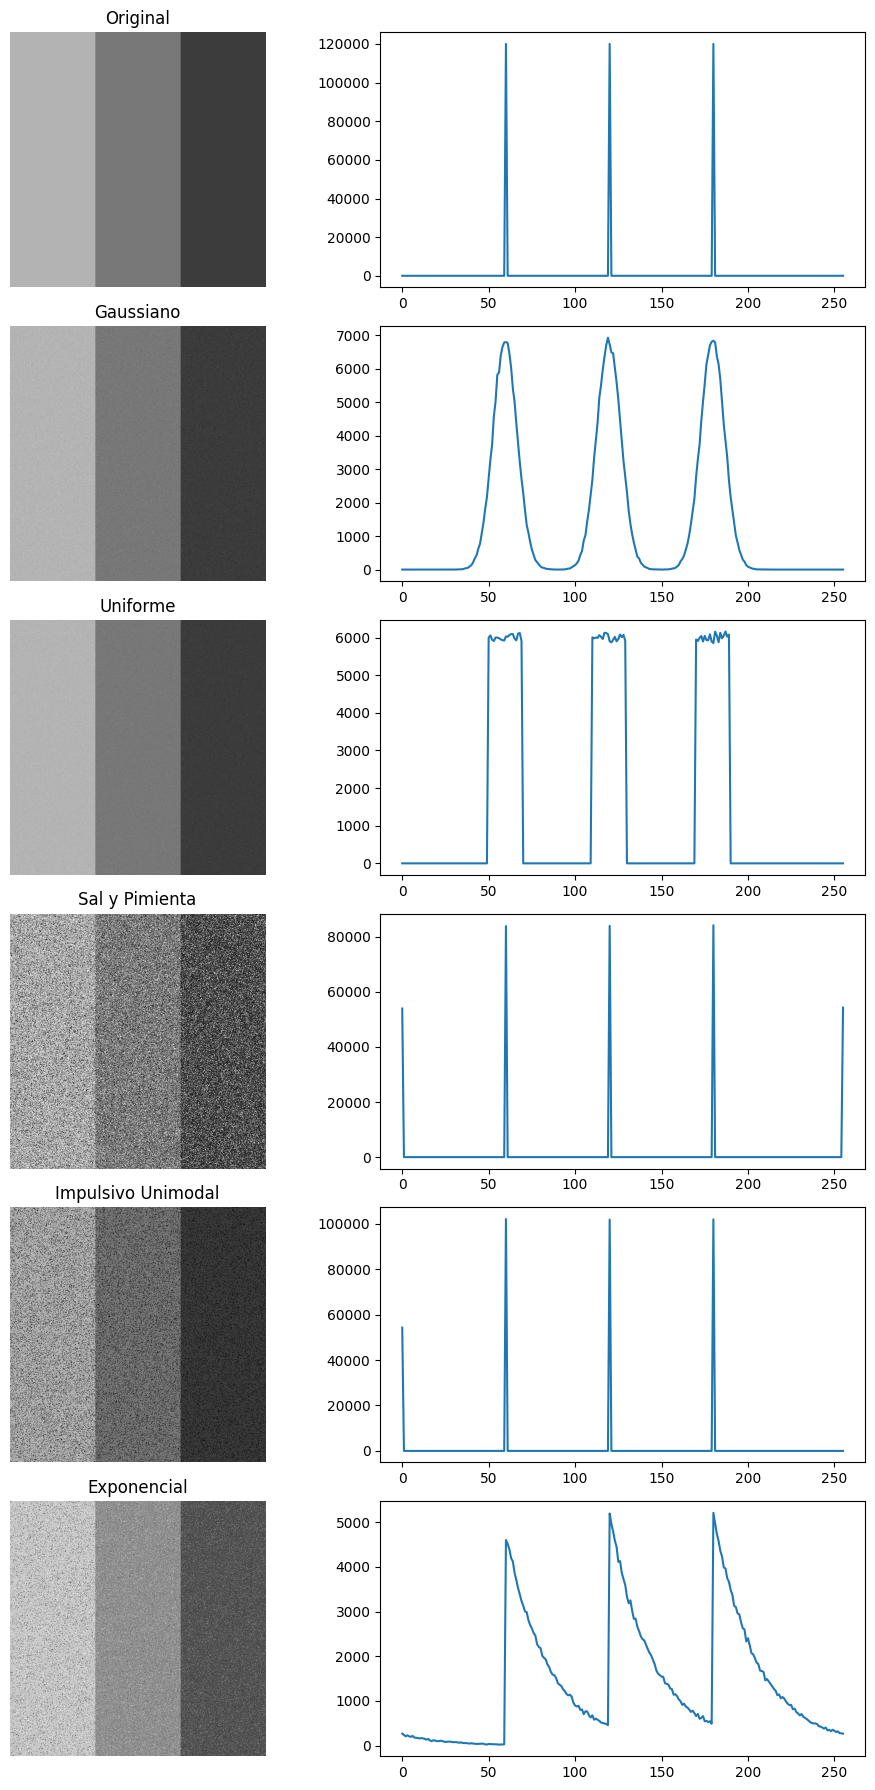

In [ ]:
# Mostrar y comparar imágenes ruidosas
plt.figure(figsize=(10,18))

plt.subplot(6, 2, 1)
plt.imshow(franjas,cmap='gray',vmin=0,vmax=255)
plt.title('Original')
plt.axis('off')
plt.subplot(6, 2, 2)
plt.plot(hist_original)

plt.subplot(6, 2, 3)
plt.imshow(gaussian_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Gaussiano')
plt.axis('off')
plt.subplot(6, 2, 4)
plt.plot(hist_gaussian)

plt.subplot(6, 2, 5)
plt.imshow(uniform_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Uniforme')
plt.axis('off')
plt.subplot(6, 2, 6)
plt.plot(hist_uniform)

plt.subplot(6, 2, 7)
plt.imshow(salt_and_pepper_noisy,cmap='gray',vmin=0,vmax=255)
plt.title('Sal y Pimienta')
plt.axis('off')
plt.subplot(6, 2, 8)
plt.plot(hist_sp)

plt.subplot(6, 2, 9)
plt.imshow(impulsive_unimodal_noisy, cmap='gray',vmin=0,vmax=255)
plt.title('Impulsivo Unimodal')
plt.axis('off')
plt.subplot(6, 2, 10)
plt.plot(hist_impulsive)

plt.subplot(6, 2, 11)
plt.imshow(exponential_noisy, cmap='gray',vmin=0,vmax=255)
plt.title('Exponencial')
plt.axis('off')
plt.subplot(6, 2, 12)
plt.plot(hist_exponential)

plt.tight_layout()
plt.show()

## **Ejercicio 2:**  Filtros de medias

1. Implemente los filtros de la media geométrica y de la media contra-armónica.

In [ ]:
def geometric_mean_filter(image, filter_size):
    im_H, im_W = image.shape
    padsize = (filter_size - 1) // 2 # Calcular el tamaño del padding necesario

    # Añadir padding a la imagen para manejar los bordes
    # cv.copyMakeBorder se usa para añadir bordes constantes de valor 1 alrededor de la imagen
    im_p = cv.copyMakeBorder(np.copy(image), padsize, padsize, padsize, padsize, cv.BORDER_CONSTANT, value=1).astype(np.float64)

    im_f_mg = np.zeros(image.shape)

    # Aplicar el filtro de media geométrica
    for i in range(im_H):
        for j in range(im_W):
            window = im_p[i:i + filter_size, j:j + filter_size] # Extraer la ventana de la imagen con padding
            product = np.prod(window)
            im_f_mg[i, j] = product ** (1 / (filter_size ** 2))

    return np.uint8(im_f_mg) # Convertir la imagen filtrada al tipo uint8 para asegurar que los valores sean válidos en el rango [0, 255]


def contrarmonic_filter(image, ksize, Q): # función recibe imagen, tamaño de la ventana del filtro (debe ser impar) y Q es orden del filtro contra-armónico
    im_H, im_W = image.shape
    padsize = (ksize - 1) // 2 # Calcular el tamaño del padding necesario

    # Añadir padding a la imagen para manejar los bordes
    # cv.copyMakeBorder se usa para añadir bordes de ceros alrededor de la imagen
    im_p = cv.copyMakeBorder(np.copy(image), padsize, padsize, padsize, padsize, cv.BORDER_CONSTANT, value=0).astype(np.float64)

    im_f_mch = np.zeros(image.shape)

    # Aplicar el filtro contrarmónico
    for i in range(im_H):
        for j in range(im_W):
            window = im_p[i:i + ksize, j:j + ksize] # Extraer la ventana de la imagen con padding
            numerator = np.sum(window ** (Q + 1))
            denominator = np.sum(window ** Q)

            # Calcular el valor filtrado, manejando divisiones por cero
            im_f_mch[i, j] = numerator / (denominator + 1e-6)

    return np.uint8(im_f_mch) # Convertir la imagen filtrada al tipo uint8 para valores válidos en el rango [0, 255]

2. Genere una imagen ruidosa a partir de 'sangre.jpg', contaminándola con una mezcla de ruido impulsivo y gaussiano.

In [ ]:
def ruido_gaussiano(image, mean=100, stdev=10): # función recibe imagen, media de la distribución gaussiana, desviación estandar de la distribución gaussiana
    gauss = np.random.normal(mean, stdev, image.shape)  # genera matriz de ruido gaussiano
    noise_image = image + gauss   # agrego ruido a la imagen
    return np.uint8(noise_image)  # devuelve imagen con ruido con valores válidos

def ruido_impulsivo(image, salt_prob=0.01, pepper_prob=0.01):  # función recibe imagen, probabilidad de agregar ruido sal (píxeles blancos), probabilidad de agregar ruido pimienta (píxeles negros)
    noise_image = image.copy()
    probs = np.random.random(noise_image.shape[:2])
    noise_image[probs < salt_prob] = 255      # ruido sal pongo píxel en 255 -> blanco
    noise_image[probs > 1 - pepper_prob] = 0  # ruido pimienta pongo píxel en 0 -> negro
    return np.uint8(noise_image)  # función devuelve imagen con ruido impulsivo con valores válidos

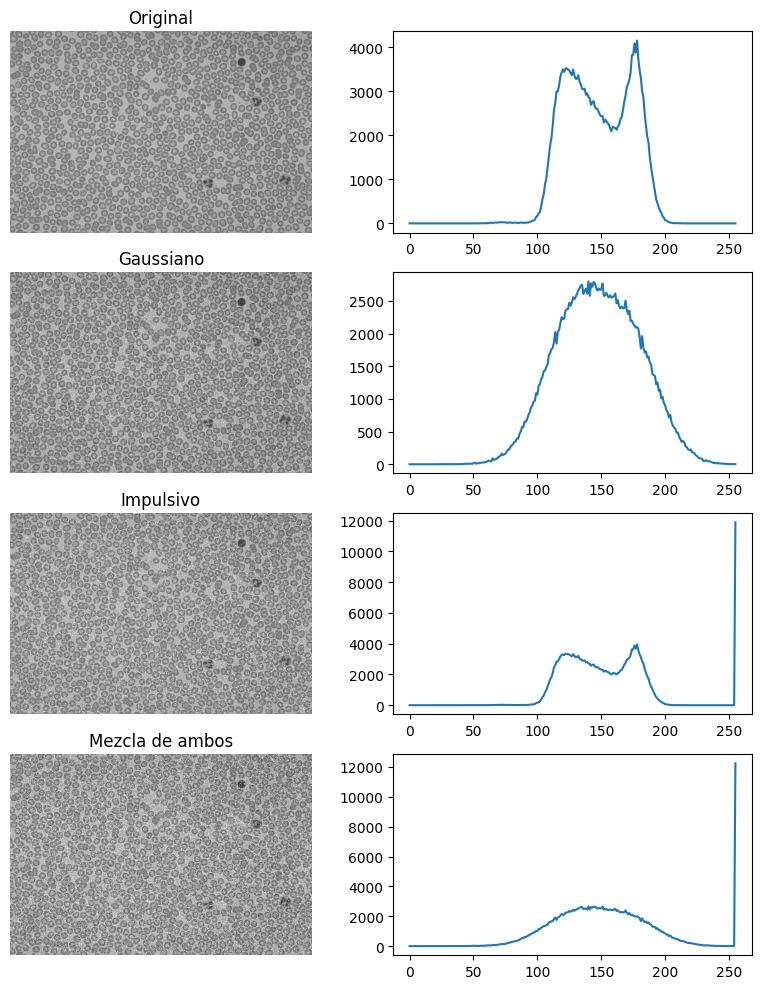

In [ ]:
sangre = cv.imread('/content/drive/My Drive/PDI/sangre.jpg', cv.IMREAD_GRAYSCALE)
sangre_gauss = ruido_gaussiano(sangre.copy(), mean=0, stdev=20)                     # solo gaussiano
sangre_imp = ruido_impulsivo(sangre.copy(),salt_prob=0.05,pepper_prob=0.0)          # solo impulsivo (unipolar)
sangre_gauss_imp = ruido_impulsivo(sangre_gauss,salt_prob=0.05,pepper_prob=0.0)     # ambos

hist_sangre = cv.calcHist([sangre], [0], None, [256], [0, 256])
hist_sangre_gaussian = cv.calcHist([sangre_gauss], [0], None, [256], [0, 256])
hist_sangre_imp = cv.calcHist([sangre_imp], [0], None, [256], [0, 256])
hist_sangre_ambos = cv.calcHist([sangre_gauss_imp], [0], None, [256], [0, 256])

plt.figure(figsize=(8,10))

plt.subplot(4, 2, 1)
plt.imshow(sangre,cmap='gray',vmin=0,vmax=255)
plt.title('Original')
plt.axis('off')
plt.subplot(4, 2, 2)
plt.plot(hist_sangre)

plt.subplot(4, 2, 3)
plt.imshow(sangre_gauss,cmap='gray',vmin=0,vmax=255)
plt.title('Gaussiano')
plt.axis('off')
plt.subplot(4, 2, 4)
plt.plot(hist_sangre_gaussian)

plt.subplot(4, 2, 5)
plt.imshow(sangre_imp,cmap='gray',vmin=0,vmax=255)
plt.title('Impulsivo')
plt.axis('off')
plt.subplot(4, 2, 6)
plt.plot(hist_sangre_imp)

plt.subplot(4, 2, 7)
plt.imshow(sangre_gauss_imp,cmap='gray',vmin=0,vmax=255)
plt.title('Mezcla de ambos')
plt.axis('off')
plt.subplot(4, 2, 8)
plt.plot(hist_sangre_ambos)

plt.tight_layout()
plt.show()

3. Aplique los filtros y verifique la restauración de forma cualitativa. Luego, evalúe los resultados cuantitativamente mediante la comparación del ECM (entre cada imagen filtrada y la limpia) vs. el ECM (entre la imagen degradada y la limpia).

In [ ]:
# Aplicamos primero contra-armónica ya que media geométrica falla para sal y pimienta. Luego, aplicamos media geométrica para mejorar el ruido gaussiano que todavía queda.
sangre_filtrada_ca = contrarmonic_filter(sangre_gauss_imp,3,1)  # sólo contra-armónica
sangre_filtrada_1 = geometric_mean_filter(sangre_filtrada_ca,2)

# Si aplicamos primero gauss y después, vamos a ver problemas porque gauss falla ante sal y pimienta. El contra-armónico no puede solucionarlo después pq' se rompió todo.
sangre_filtrada_geo = geometric_mean_filter(sangre_gauss_imp,2) # sólo media geométrica
sangre_filtrada_2 = contrarmonic_filter(sangre_filtrada_geo,3,1)

hist_sangre_ca = cv.calcHist([sangre_filtrada_ca], [0], None, [256], [0, 256])
hist_sangre_geo = cv.calcHist([sangre_filtrada_geo], [0], None, [256], [0, 256])
hist_sangre_1 = cv.calcHist([sangre_filtrada_1], [0], None, [256], [0, 256])
hist_sangre_2 = cv.calcHist([sangre_filtrada_2], [0], None, [256], [0, 256])

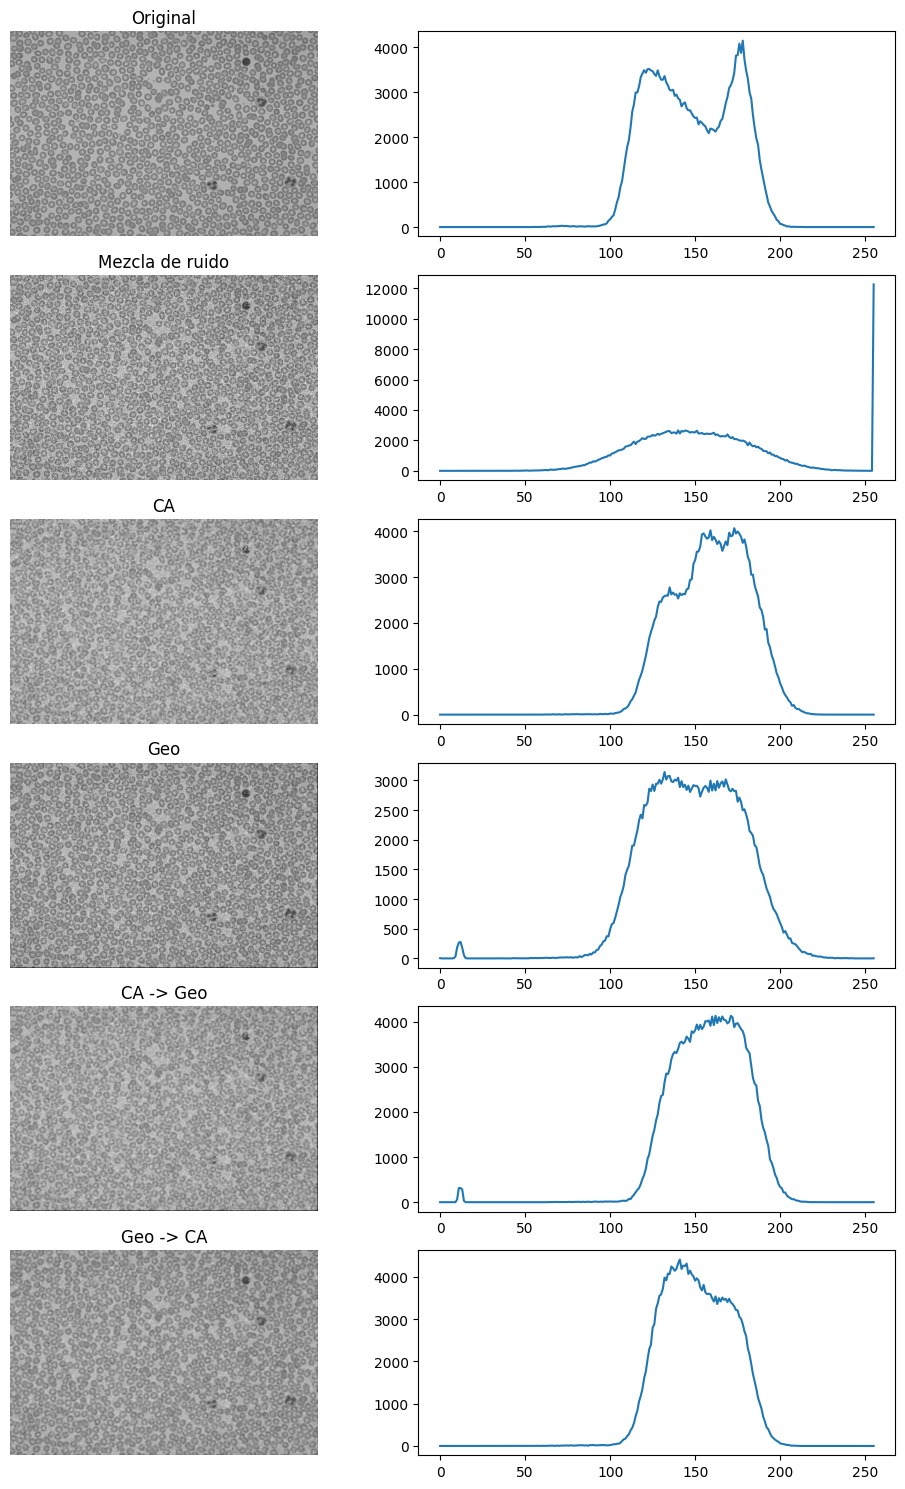

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(6, 2, 1)
plt.imshow(sangre,cmap='gray',vmin=0,vmax=255)
plt.title('Original')
plt.axis('off')
plt.subplot(6, 2, 2)
plt.plot(hist_sangre)

plt.subplot(6, 2, 3)
plt.imshow(sangre_gauss_imp,cmap='gray',vmin=0,vmax=255)
plt.title('Mezcla de ruido')
plt.axis('off')
plt.subplot(6, 2, 4)
plt.plot(hist_sangre_ambos)

plt.subplot(6, 2, 5)
plt.imshow(sangre_filtrada_ca,cmap='gray',vmin=0,vmax=255)
plt.title('CA')
plt.axis('off')
plt.subplot(6, 2, 6)
plt.plot(hist_sangre_ca)

plt.subplot(6, 2, 7)
plt.imshow(sangre_filtrada_geo,cmap='gray',vmin=0,vmax=255)
plt.title('Geo')
plt.axis('off')
plt.subplot(6, 2, 8)
plt.plot(hist_sangre_geo)

plt.subplot(6, 2, 9)
plt.imshow(sangre_filtrada_1,cmap='gray',vmin=0,vmax=255)
plt.title('CA -> Geo')
plt.axis('off')
plt.subplot(6, 2, 10)
plt.plot(hist_sangre_1)

plt.subplot(6, 2, 11)
plt.imshow(sangre_filtrada_2,cmap='gray',vmin=0,vmax=255)
plt.title('Geo -> CA')
plt.axis('off')
plt.subplot(6, 2, 12)
plt.plot(hist_sangre_2)

plt.tight_layout()
plt.show()

In [ ]:
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [ ]:
print(f'MSE original vs. ruido: {mse(sangre,sangre_gauss_imp)}')
print(f'MSE original vs. contra-armónica: {mse(sangre,sangre_filtrada_ca)}')
print(f'MSE original vs. geométrica: {mse(sangre,sangre_filtrada_geo)}')
print(f'MSE original vs. (contra-armónica -> geométrica): {mse(sangre,sangre_filtrada_1)}')
print(f'MSE original vs. (geométrica -> contra-armónica): {mse(sangre,sangre_filtrada_2)}')

MSE original vs. ruido: 993.8479708333333
MSE original vs. contra-armónica: 427.45065
MSE original vs. geométrica: 395.80752083333334
MSE original vs. (contra-armónica -> geométrica): 492.4750375
MSE original vs. (geométrica -> contra-armónica): 235.14527083333334


## **Ejercicio 3:** Filtros de orden

1. Implemente los siguientes filtros y aplíquelos a la misma imagen degradada del ejercicio anterior.

(a) Filtro de mediana,

(b) Filtro del punto medio,

(c) Filtro de media-alfa recortado.

(d) Aplique sucesivamente el filtro (a) y luego el filtro (b).

In [ ]:
# funciones filtros

def filtro_mediana(img,kernel_size = 3):
  output = cv.medianBlur(img,kernel_size)
  return np.uint8(output)

def filtro_punto_medio(image, kernel_size = 3):
  output = np.zeros(image.shape)
  H, W = image.shape
  padsize = (kernel_size-1)//2
  im_p = cv.copyMakeBorder(np.copy(image), *[padsize]*4, cv.BORDER_CONSTANT,0).astype(np.float64)

  for i in range(H):
      for j in range(W):
          vMin, vMax = cv.minMaxLoc(im_p[i:i+kernel_size,j:j+kernel_size])[0:2]
          output[i, j] = (vMin+vMax)/2
  return np.uint8(output)

def filtro_media_alfa(img, kernel_size = 3, d = 8):
  output = np.zeros(img.shape)
  im_H, im_W = img.shape
  padsize = (kernel_size-1)//2
  im_p = cv.copyMakeBorder(np.copy(img), *[padsize]*4, cv.BORDER_CONSTANT,0).astype(np.float64)

  for i in range(im_H):
      for j in range(im_W):
          S = np.sort(im_p[i:i+kernel_size,j:j+kernel_size].flatten())
          S = S[d//2:S.shape[0]-d//2]
          output[i, j] = np.sum(S)/S.shape[0]

  return np.uint8(output)

In [ ]:
# Aplico los filtros:
sangre_mediana = filtro_mediana(sangre_gauss_imp.copy())
sangre_punto_medio = filtro_punto_medio(sangre_gauss_imp.copy())
sangre_media_alfa = filtro_media_alfa(sangre_gauss_imp.copy())
sangre_mediana_punto_medio = filtro_punto_medio(sangre_mediana.copy())

# Obtengo histogramas:
hist_sangre_mediana = cv.calcHist([sangre_mediana], [0], None, [256], [0, 256])
hist_sangre_punto_medio = cv.calcHist([sangre_punto_medio], [0], None, [256], [0, 256])
hist_sangre_media_alfa = cv.calcHist([sangre_media_alfa], [0], None, [256], [0, 256])
hist_sangre_mediana_punto_medio = cv.calcHist([sangre_mediana_punto_medio], [0], None, [256], [0, 256])

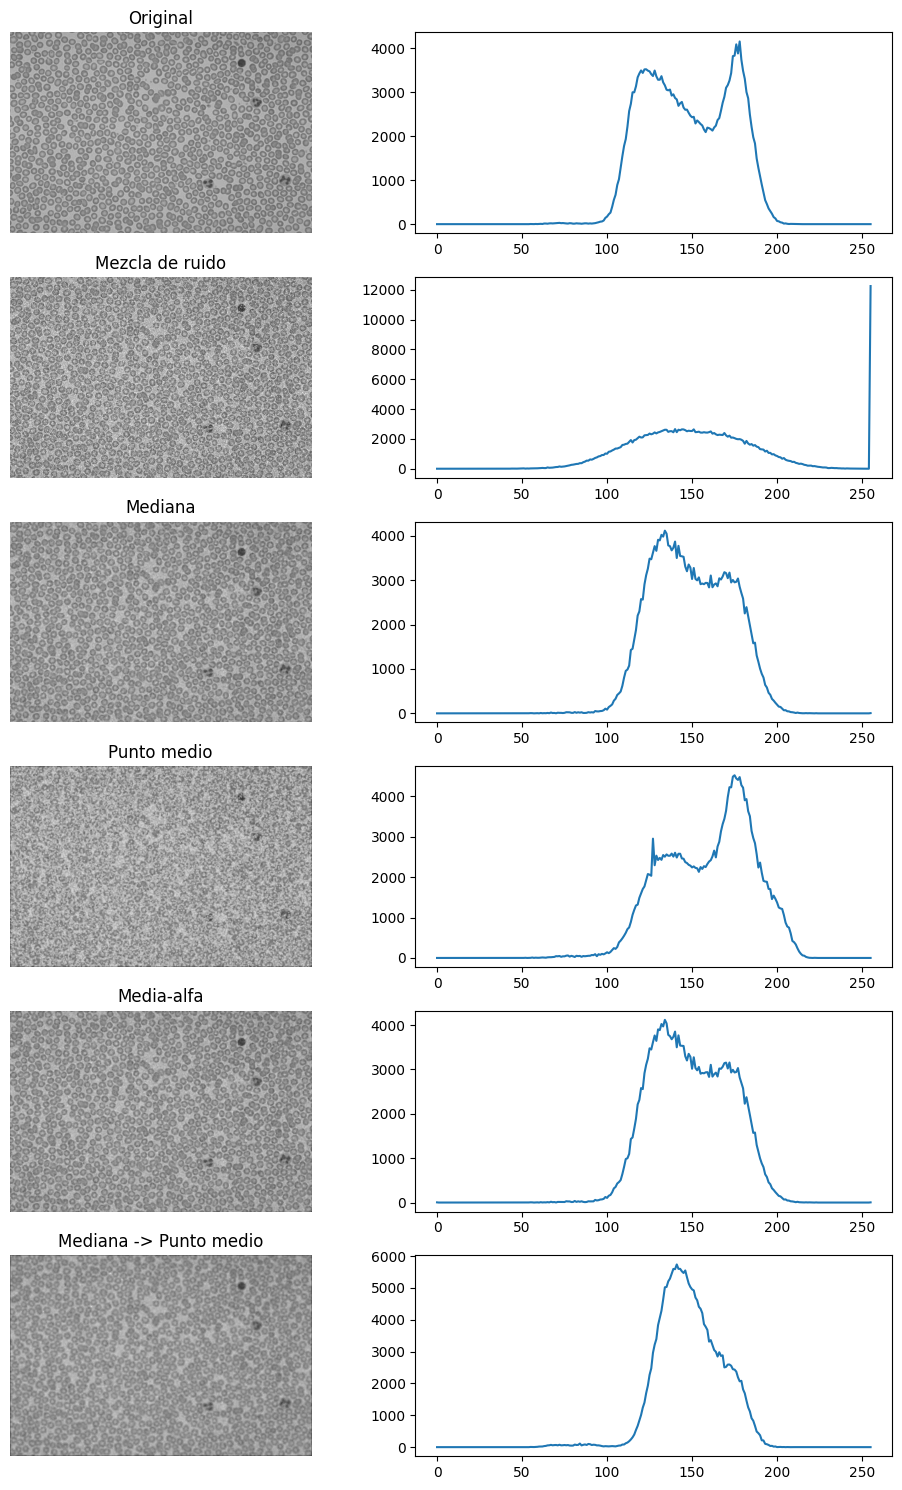

In [ ]:
plt.figure(figsize=(10,15))

plt.subplot(6, 2, 1)
plt.imshow(sangre,cmap='gray',vmin=0,vmax=255)
plt.title('Original')
plt.axis('off')
plt.subplot(6, 2, 2)
plt.plot(hist_sangre)

plt.subplot(6, 2, 3)
plt.imshow(sangre_gauss_imp,cmap='gray',vmin=0,vmax=255)
plt.title('Mezcla de ruido')
plt.axis('off')
plt.subplot(6, 2, 4)
plt.plot(hist_sangre_ambos)

plt.subplot(6, 2, 5)
plt.imshow(sangre_mediana,cmap='gray',vmin=0,vmax=255)
plt.title('Mediana')
plt.axis('off')
plt.subplot(6, 2, 6)
plt.plot(hist_sangre_mediana)

plt.subplot(6, 2, 7)
plt.imshow(sangre_punto_medio,cmap='gray',vmin=0,vmax=255)
plt.title('Punto medio')
plt.axis('off')
plt.subplot(6, 2, 8)
plt.plot(hist_sangre_punto_medio)

plt.subplot(6, 2, 9)
plt.imshow(sangre_media_alfa,cmap='gray',vmin=0,vmax=255)
plt.title('Media-alfa')
plt.axis('off')
plt.subplot(6, 2, 10)
plt.plot(hist_sangre_media_alfa)

plt.subplot(6, 2, 11)
plt.imshow(sangre_mediana_punto_medio,cmap='gray',vmin=0,vmax=255)
plt.title('Mediana -> Punto medio')
plt.axis('off')
plt.subplot(6, 2, 12)
plt.plot(hist_sangre_mediana_punto_medio)

plt.tight_layout()
plt.show()

In [ ]:
print(f'MSE original vs. ruido: {mse(sangre,sangre_gauss_imp)}')
print(f'MSE original vs. mediana: {mse(sangre,sangre_mediana)}')
print(f'MSE original vs. punto medio: {mse(sangre,sangre_punto_medio)}')
print(f'MSE original vs. media-alfa: {mse(sangre,sangre_media_alfa)}')
print(f'MSE original vs. (mediana -> punto medio): {mse(sangre,sangre_mediana_punto_medio)}')

MSE original vs. ruido: 993.8479708333333
MSE original vs. mediana: 159.73535
MSE original vs. punto medio: 714.5891208333334
MSE original vs. media-alfa: 162.09381666666667
MSE original vs. (mediana -> punto medio): 262.00655


**2.** Indique en cuál de los casos se logra una mejor remoción del ruido.
¿Qué particularidades observa en cada uno de los resultados?
Visualice los histogramas antes y después de cada uno de los filtrados.
Compare los resultados subjetivamente y mediante el ECM.

> **Observando los histogramas:** Vemos que en general todos los filtros lograron volver a algo bastante parecido al histograma original. En particular, se destaca que todos lograron quitar el ruido impulsivo que se veía en el 255 (sal). Los que más parecen acercarse a la forma del original son el filtro de *mediana* y el filtro de *media-alfa*. Por otro lado, los más alejados parecen ser el de *punto medio* y *mediana -> punto medio*, que tienen picos más pronunciados pero siguen la forma general de dos "montañas".

> **Analizando los MSE:** Se puede confirmar que todos los filtrados han tenido resultados decentes. En cuanto a *mediana* y *media-alfa*, que parecían estar casi iguales mirando los histogramas, con esta medida objetiva logramos confirmar que *mediana* fue mejor aunque por muy poco (MSE = 160.58 para mediana, MSE = 163.07 para media-alfa). También confirmamos que *punto medio* tuvo el peor desempeño.

**3.** Compare, discuta y saque conclusiones respecto de los resultados del filtrado de medias del Ejercicio 2.

In [ ]:
print(f'MSE avg filtros de media: {np.average([mse(sangre,sangre_filtrada_ca), mse(sangre,sangre_filtrada_geo), mse(sangre,sangre_filtrada_1), mse(sangre,sangre_filtrada_2)])}')
print(f'MSE avg filtros de orden: {np.average([mse(sangre,sangre_mediana), mse(sangre,sangre_punto_medio), mse(sangre,sangre_media_alfa), mse(sangre,sangre_mediana_punto_medio)])}')

MSE avg filtros de media: 387.7196197916667
MSE avg filtros de orden: 324.60620937500005


Sacando el valor más alto para cada tipo (filtro punto-medio para orden y filtro :

In [ ]:
print(f'MSE avg filtros de media: {np.average([mse(sangre,sangre_filtrada_ca), mse(sangre,sangre_filtrada_geo), mse(sangre,sangre_filtrada_2)])}')
print(f'MSE avg filtros de orden: {np.average([mse(sangre,sangre_mediana), mse(sangre,sangre_media_alfa), mse(sangre,sangre_mediana_punto_medio)])}')

MSE avg filtros de media: 352.8011472222222
MSE avg filtros de orden: 194.61190555555558


> El filtrado fue mucho mejor con las técnicas no lineales, comprobable al comparar los valores de los MSE en cada caso. El mejor filtrado de los filtros de medias tuvo un MSE de 232.7 y el peor 486.96. Por otro lado, el mejor filtrado de los filtros de orden tuvo un MSE de 160.58 y el peor 708.7 (pero el segundo peor 264.05, muy cerca del mejor de filtros de medias).

> Si bien los filtros de media son más fáciles de implementar por ser lineales, los filtros de orden tienen un mayor costo computacional pero son más robustos al ruido impulsivo que es uno de los que queríamos filtrar en este caso.

> Otro comentario para agregar es que en el caso de los filtros de medias tenemos la característica del suavizado de bordes que, en este caso, no nos es favorable como se puede evidenciar en los bordes de los glóbulos. Éstos se ven más borrosos tras el filtrado, a diferencia del caso de los filtros de orden que logran preservar esos bordes ya que no promedian valores en las vecindades.

# **Ejercicio 5:** Eliminación de ruido periódico

1. La imagen 'img degradada.tif' está degradada por una interferencia sinusoidal. Muestre la imagen y su espectro de Fourier, y analice la información del ruido.

In [ ]:
def get_fft(image):
    img_fft = np.fft.fft2(image)
    img_fft_shift = np.fft.fftshift(img_fft)
    magnitude_spectrum = np.abs(img_fft_shift)
    # logaritmo para mayor contraste:
    log_magnitude_spectrum = np.log(magnitude_spectrum + 1e-6) # sumo epsilon p/ evitar log(0)
    return log_magnitude_spectrum

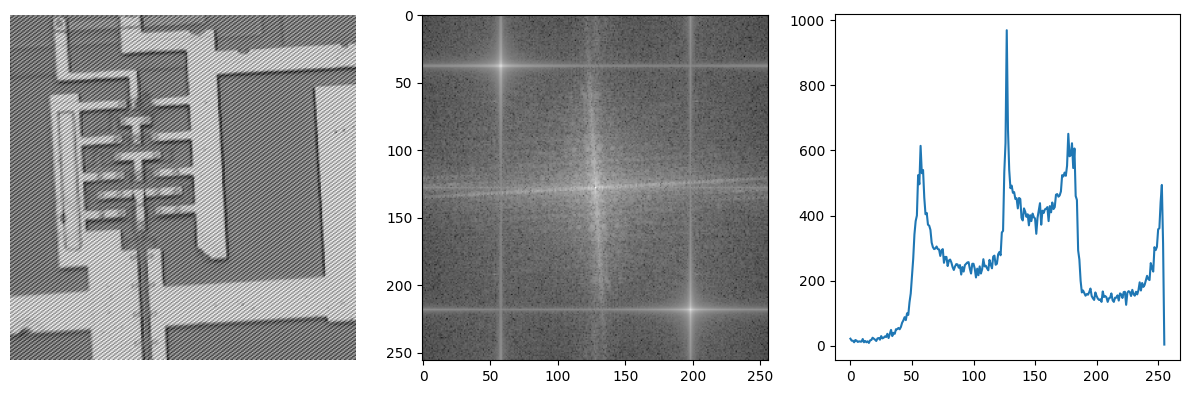

In [ ]:
degradada = cv.imread('/content/drive/My Drive/PDI/img_degradada.tif', cv.IMREAD_GRAYSCALE)
degradada_fft = get_fft(degradada)
degradada_histo = cv.calcHist([degradada], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1,3,figsize=(12,4))

ax[0].imshow(degradada,cmap='gray')
ax[0].axis('off')
ax[1].imshow(degradada_fft,cmap='gray')
ax[2].plot(degradada_histo)
plt.tight_layout()
plt.show()

2. Localice los picos fundamentales del ruido. (semi-autom´atico con clicks en la imagen o autom´atico localizando las magnitudes de los picos del ruido).

In [ ]:
from skimage.feature import peak_local_max
peaks = peak_local_max(degradada_fft, min_distance=26)

print("Coordenadas de los picos fundamentales del ruido:")
for peak in peaks:
    print("Fila:", peak[0], "Columna:", peak[1])

Coordenadas de los picos fundamentales del ruido:
Fila: 128 Columna: 128
Fila: 38 Columna: 58
Fila: 218 Columna: 198
Fila: 38 Columna: 198
Fila: 218 Columna: 58


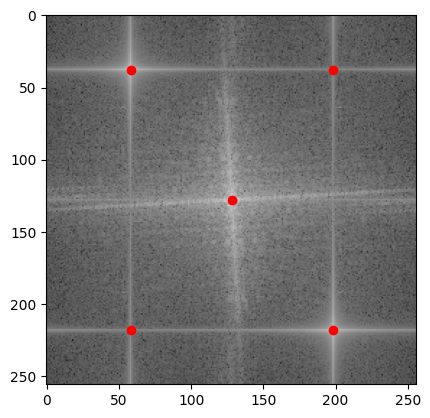

In [ ]:
plt.imshow(degradada_fft, cmap='gray')

# Marcar los picos en rojo
for peak in peaks:
    plt.plot(peak[1], peak[0], 'ro')

plt.show()

## **Ejercicio 7:** Aplicación

Para las imágenes FAMILIA a.jpg, FAMILIA b.jpg y FAMILIA c.jpg, identifique el tipo de ruido que afecta a cada una y calcule los parámetros estadísticos para dichos ruidos. Elija apropiadamente el mejor filtro para cada caso, ajuste los parámetros y restaure las imágenes.

In [ ]:
familia_a = cv.imread('/content/drive/My Drive/PDI/FAMILIA_a.jpg', cv.IMREAD_GRAYSCALE)
histo_familia_a = cv.calcHist([familia_a], [0], None, [256], [0, 256])
fft_familia_a = get_fft(familia_a)

familia_b = cv.imread('/content/drive/My Drive/PDI/FAMILIA_b.jpg', cv.IMREAD_GRAYSCALE)
histo_familia_b = cv.calcHist([familia_b], [0], None, [256], [0, 256])
fft_familia_b = get_fft(familia_b)

familia_c = cv.imread('/content/drive/My Drive/PDI/FAMILIA_c.jpg', cv.IMREAD_GRAYSCALE)
histo_familia_c = cv.calcHist([familia_c], [0], None, [256], [0, 256])
fft_familia_c = get_fft(familia_c)

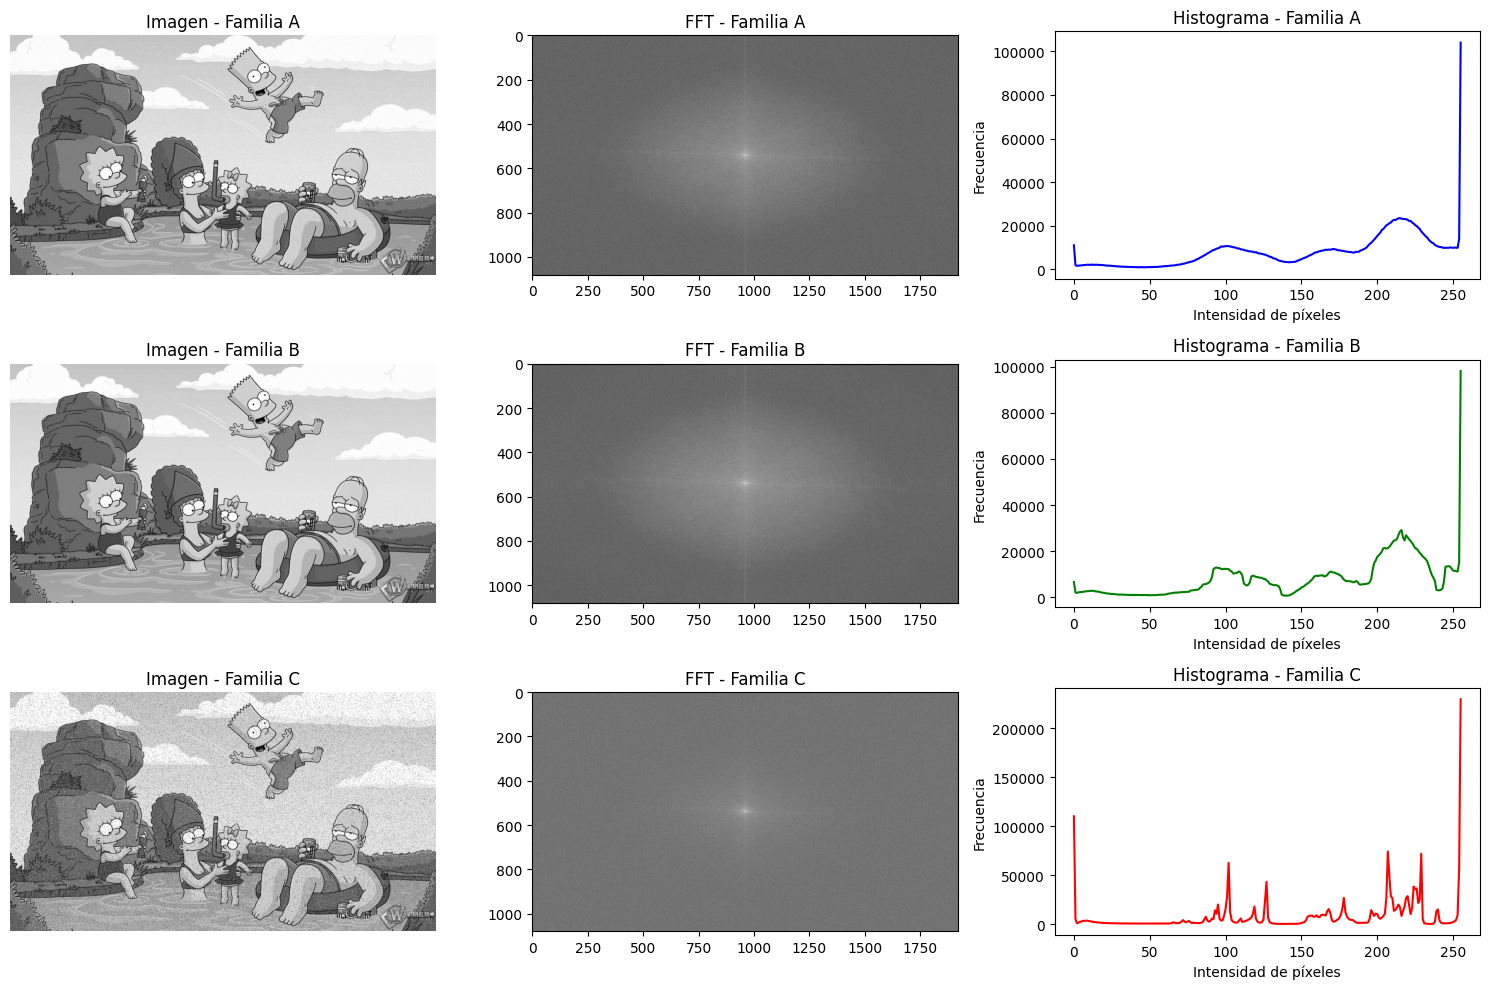

In [ ]:
# Graficar imágenes, FFTs y histogramas
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(familia_a, cmap='gray')
plt.title('Imagen - Familia A')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(fft_familia_a, cmap='gray')
plt.title('FFT - Familia A')

plt.subplot(3, 3, 3)
plt.plot(histo_familia_a, color='b')
plt.title('Histograma - Familia A')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')

plt.subplot(3, 3, 4)
plt.imshow(familia_b, cmap='gray')
plt.title('Imagen - Familia B')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(fft_familia_b, cmap='gray')
plt.title('FFT - Familia B')

plt.subplot(3, 3, 6)
plt.plot(histo_familia_b, color='g')
plt.title('Histograma - Familia B')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')

plt.subplot(3, 3, 7)
plt.imshow(familia_c, cmap='gray')
plt.title('Imagen - Familia C')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(fft_familia_c, cmap='gray')
plt.title('FFT - Familia C')

plt.subplot(3, 3, 9)
plt.plot(histo_familia_c, color='r')
plt.title('Histograma - Familia C')
plt.xlabel('Intensidad de píxeles')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

In [ ]:
# Función para actualizar la imagen filtrada cuando cambie el tamaño del kernel
def actualizar_filtro(kernel_size,sigma_color,sigma_space):
    familia_a_filtrada = cv.bilateralFilter(familia_a, kernel_size, 40, 40)
    plt.figure(figsize=(16,16))
    plt.imshow(familia_a_filtrada, cmap='gray')
    plt.title(f'Kernel size = {kernel_size}, sigma_color = {sigma_color}, sigma_space = {sigma_space}')
    plt.axis('off')
    plt.show()

# Crear una barra deslizante para el tamaño del kernel
slider_kernel_size = widgets.IntSlider(value=11, min=1, max=15, step=1, description='Kernel size')
slider_sigma_color = widgets.IntSlider(value=40, min=10, max=80, step=1, description='Sigma color')
slider_sigma_space = widgets.IntSlider(value=40, min=10, max=80, step=1, description='Sigma space')

# Vincular la función de actualización al evento de cambio en la barra deslizante
widgets.interactive(actualizar_filtro, kernel_size=slider_kernel_size, sigma_color=slider_sigma_color, sigma_space=slider_sigma_space)

interactive(children=(IntSlider(value=11, description='Kernel size', max=15, min=1), IntSlider(value=40, descr…

In [ ]:
# Función para actualizar la imagen filtrada cuando cambie el tamaño del kernel
def actualizar_filtro(kernel_size,sigma_color,sigma_space):
    familia_b_filtrada = cv.bilateralFilter(familia_b, kernel_size, 40, 40)
    plt.figure(figsize=(16,16))
    plt.imshow(familia_b_filtrada, cmap='gray')
    plt.title(f'Kernel size = {kernel_size}, sigma_color = {sigma_color}, sigma_space = {sigma_space}')
    plt.axis('off')
    plt.show()

# Crear una barra deslizante para el tamaño del kernel
slider_kernel_size = widgets.IntSlider(value=7, min=1, max=11, step=1, description='Kernel size')
slider_sigma_color = widgets.IntSlider(value=40, min=10, max=80, step=1, description='Sigma color')
slider_sigma_space = widgets.IntSlider(value=40, min=10, max=80, step=1, description='Sigma space')

# Vincular la función de actualización al evento de cambio en la barra deslizante
widgets.interactive(actualizar_filtro, kernel_size=slider_kernel_size, sigma_color=slider_sigma_color, sigma_space=slider_sigma_space)

interactive(children=(IntSlider(value=7, description='Kernel size', max=11, min=1), IntSlider(value=40, descri…

In [ ]:
# Función para actualizar la imagen filtrada cuando cambie el tamaño del kernel
def actualizar_filtro(kernel_size):
    familia_c_filtrada = filtro_mediana(familia_c.copy(), kernel_size)
    plt.figure(figsize=(16,16))
    plt.imshow(familia_c_filtrada, cmap='gray')
    plt.title(f'Kernel size = {kernel_size}')
    plt.axis('off')
    plt.show()

# Crear una barra deslizante para el tamaño del kernel
slider_kernel_size = widgets.IntSlider(value=3, min=1, max=11, step=2, description='Kernel size')

# Vincular la función de actualización al evento de cambio en la barra deslizante
widgets.interactive(actualizar_filtro, kernel_size=slider_kernel_size)

interactive(children=(IntSlider(value=3, description='Kernel size', max=11, min=1, step=2), Output()), _dom_cl…